<center>
    <img style="float: left;" src="Mix_colour.png" width="200"></img>
</center>

<br/><br/>
<br/><br/>

# Models for Supervised learning

In this notebook we will learn a bit more about several more advanced supervised machine learning algorithms.

For the assignment we will use the wine dataset, containing various characteristics of the wine and its class label. Our target is to try to predict one of 3 classes. The methods we will try are:
- Decision trees
- Random forest
- K-nearest neighbors
- Neural networks

## Data

Let's start from uploading the wine dataset.

In [1]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('/home/jovyan/Data/wine.csv')

To get more familiar with the data, let's take a quick look.

In [2]:
df_wine.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
df_wine.shape

(178, 14)

In the dataset there are 13 numerical features describing alcohol percentage, ash, flavanoids, etc., and the label column. There are 3 classes (let's refer to them as 'class_0', 'class_1', and 'class_2'). These classes could correspond to some typical wine varietals like Pinot Noir, or Cabernet, or Merlot.
For better understanding of the dataset, let's check the general statistic of the features.

In [4]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Let's check if there are any missing values.

In [5]:
df_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

There are a total of 178 samples and no features have missing values.

Let's check the distribution of data by classes.

In [6]:
df_wine['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

You can see that the distribution of data by classes is quite balanced. Now we can start the modelling.

## Machine learning algorithms

Let's try out different algorithms for classification and compare their performances. 
Before implementing any models let's split the data to train and test sets. 

In [7]:
from sklearn.model_selection import train_test_split

X = df_wine.iloc[:,:-1]
y = df_wine['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1235)

### Decision Trees

Recall that for classification with multiple classes one can use desicion trees. In the reading material you have learnt how a decision tree algorithm works both for classification and regression problems. 

Now let's go deeper in understanding the decision tree classifiers.

### Q1:

For a decision tree classifier, what are common measures for creating the splits? 
1. Jimmy Index.
2. Cross-Entropy. 
3. Mean Absolute Error.
4. Gini Impurity.
5. Mean Absolute Misclassification. 

In [14]:
# Fill in your answer in the form of a list of a number or numbers: example Q1_answer = [6,7,8]

### START ANSWER HERE ###
Q1_answer = [2, 4]
### END ANSWER HERE ###

In [15]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(set(Q1_answer)) == '9ddb7ad6e43bc6325ac123bfa58c342f':
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [ ]:
# nbgrader cell


### Q2:

Now create a decision tree model and fit it to the training data. 

**Hint:**
* import a necessary package from scikit-learn
* create an instance of a desicion tree classifier using `random_state=100`. Use `decision_tree_clf = DecisionTreeClassifier()` with correct input.
* fit it to the training data

In [17]:
# (approx. 3 lines of code)
### START ANSWER HERE ###
from sklearn.tree import DecisionTreeClassifier
decision_tree_clf = DecisionTreeClassifier(random_state=100)
decision_tree_clf.fit(X_train, y_train)
### END ANSWER HERE ###

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [18]:
print('number of classes: ', decision_tree_clf.n_classes_)
print('number of features: ', decision_tree_clf.n_features_) 

number of classes:  3
number of features:  13


**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>number of classes</td> 
        <td>3</td> 
    </tr>
    <tr>
    <td>number of features</td> 
        <td>13</td> 
    </tr>
</table>

In [ ]:
# nbgrader


Let's take a look at classification report of the model on the test set. 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,decision_tree_clf.predict(X_test)))

You see above that some classes got a higher precision than the other but in general the result seems to be good. One can check the mean accuracy both on train and test sets using the built in method of the decision tree classifier. Indeed, this method provides very high score for both train and test sets. 

In [ ]:
train_score = decision_tree_clf.score(X_train,y_train)
test_score = decision_tree_clf.score(X_test,y_test)
print("Accuracy train/test: %.2f/%.2f" % (train_score, test_score))

### Q3 (multiple choice):

Which of the following statements are true?
1. A fully grown tree tend to fit the training data perfectly, while performing less good on the test data. 
2. A fully grown tree has large variance and low bias. 
3. A fully grown tree has large bias and low variance. 
4. None of the above claims are true. 

In [19]:
# Fill in your answer in the form of a list of a number or numbers: example Q3_answer = [5,6,8]

### START ANSWER HERE ###
Q3_answer = [1, 2]
### END ANSWER HERE ###

In [20]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(set(Q3_answer))=='190cda75e2bd9dc669b09abe9f1131c5':
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [ ]:
# nbgrader cell


Another information that can be useful to get from the desicion tree model is what features contributed to the result of the classification the most. Check the cell below. 

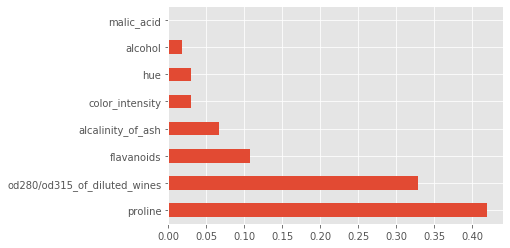

In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

features_importances = pd.Series(decision_tree_clf.feature_importances_, index=df_wine.columns[:-1])
features_importances.nlargest(8).plot(kind='barh')
plt.show()

We can see from the plot above that the biggest feature importance coming from the features 'proline', 'od280/od315_of_diluted_wines' and 'flavanoids'. 

Let's explore this further. In the cell below we plot distribusions of data stored in the 5 most important features by three classes of wine.

proline


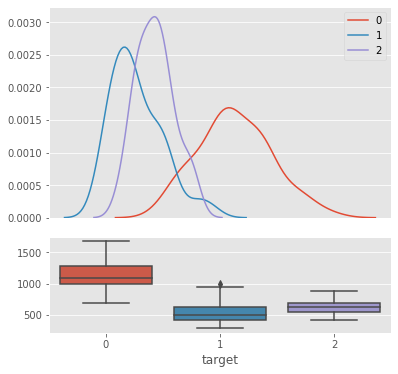

od280/od315_of_diluted_wines


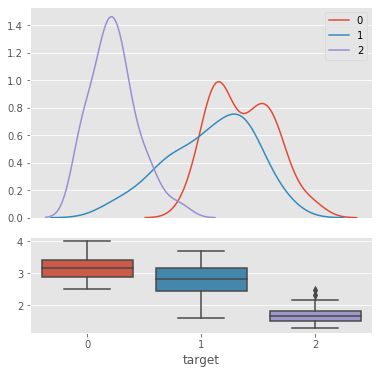

flavanoids


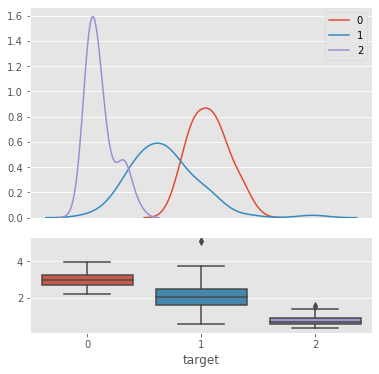

alcalinity_of_ash


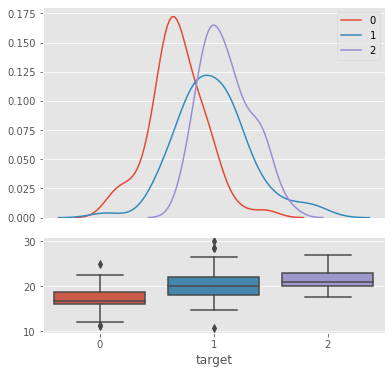

color_intensity


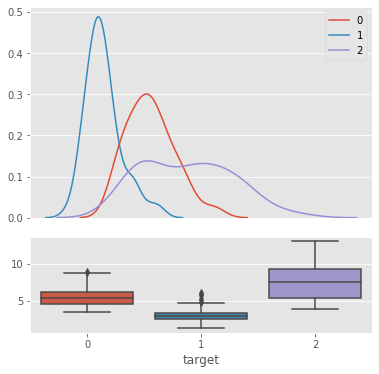

In [22]:
import seaborn as sns
import matplotlib.gridspec as gridspec

for feature in features_importances.nlargest(5).index:
    print(feature)
    fig = plt.figure(figsize=(10,6))
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sns.boxplot(x='target',y=feature,data=df_wine,ax=ax2)
    sns.kdeplot(df_wine[df_wine.target==0][feature],ax=ax1,label='0')
    sns.kdeplot(df_wine[feature][df_wine.target==1],ax=ax1,label='1')
    sns.kdeplot(df_wine[feature][df_wine.target==2],ax=ax1,label='2')
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.show()

Observe from the above figures that the feature 'proline' is a great feature to separate class 0 from 1 and 2, while the feature 'od280/od315_of_diluted_wines' does a good job for the separation of class 1 and 2. Thus we understand that it is a good strategy to first use 'proline' to separate 0 from 1 and 2, and then separate 1 and 2 using 'od280/od315_of_diluted_wines'. 

This little exercise illustrates how such visual investigations can help us to understand the decision tree choices a little bit better and make us trust the model more.  

There are a lot of advantages and disadvantages in using decision trees. For example, we can name the following: 

**Advantages**
1. Easy to interpret and make for straightforward visualizations.
2. The internal workings are capable of being observed and thus make it possible to reproduce work.
3. Can handle both numerical and categorical data.
4. Perform well on large datasets.
5. Are extremely fast.

**Disadvantages**
1. Decision trees are prone to over-fitting, especially when a tree is particularly deep. 
2. Trees can be unstable because small variations in data might result in a completely different tree being generated.
3. Can have poor prediction accuracy for responses with low sample sizes.

Ideally, we would like to minimize both error due to bias and error due to variance. This is where random forests comes in. Random forests mitigate this problem well. A random forest is simply a collection of decision trees whose results are aggregated into one final result. Their ability to limit over-fitting without substantially increasing the error due to bias is why they are such powerful models.

### Random Forest

### Q4 (multiple choice):

Which of the following statements are true?
1. Each decision tree in a random forest is built using on average only 67% unique amount of the data. 
2. The different trees in a random forest use the same 67% of data. 
3. Random forest is built from a methodology referred to as bootstrap aggregation. 
4. Random forest uses average voting system for classification while majority for regression. 
5. To make the trees uncorrelated, the trees are splitted using only a subset of the full feature space. 

In [23]:
# Fill in your answer in the form of a list of a number or numbers: example Q4_answer = [5,6,8]
### START ANSWER HERE ###
Q4_answer = [1,3,5]
### END ANSWER HERE ###

In [24]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(set(Q4_answer))=='e77261952e47cec62134d2d763c64232':
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [ ]:
# nbgrader cell


### Q5: 

Train a random forest model.

**Hints:**
* import the necessary package from scikit-learn
* use `random_forest_clf = RandomForestClassifier()` with correct input.
* train a random forest with `n_estimators=100, random_state=1` using train data. 

In [26]:
# (approx. 3 lines of the code)

### START ANSWER HERE ###
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=1)
random_forest_clf.fit(X_train, y_train)
### END ANSWER HERE ###

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [27]:
print('number of classes: ', random_forest_clf.n_classes_)
print('number of features: ', random_forest_clf.n_features_) 

number of classes:  3
number of features:  13


**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>number of classes</td> 
        <td>3</td> 
    </tr>
    <tr>
    <td>number of features</td> 
        <td>13</td> 
    </tr>
</table>

In [ ]:
# nbgrader cell


Now let's compare the preformance of the decision tree and the random forest model. Export classification reports on the test set.

In [28]:
print("""------------------- Decision trees -------------------""")
print(classification_report(y_test,decision_tree_clf.predict(X_test)))

print('\n')

print("""------------------- Random forest -------------------""")
print(classification_report(y_test,random_forest_clf.predict(X_test)))

------------------- Decision trees -------------------


NameError: name 'classification_report' is not defined

Let's also check the mean accuracy score for the random forest.

In [29]:
train_score = random_forest_clf.score(X_train,y_train)
test_score = random_forest_clf.score(X_test,y_test)
print("Accuracy train/test: %.2f/%.2f" % (train_score, test_score))

Accuracy train/test: 1.00/0.98


Although it is very hard to see, as we train perfectly both using decision trees and random forest, we do generalize a little bit better with random forest and perform better on the test set with random forest. 

Now let's try some other methods as well.

### K-Nearest Neighbors Algorithm

In the reading material we discussed the $k$-nearest neighbor algorithm for classification and regression. Now let's try to implement it for our problem.

### Q6 (multiple choice):

Which of the following statements are true?

1. $k$-nearest neighbor does not need to be trained. 
2. $k$-nearest neighbor can perform badly when the features have different scales since it uses a distance metric. 
2. $k$-nearest neighbor takes a long time to make a prediction when there are many features. 

In [32]:
# Fill in your answer in the form of a list of a number or numbers: example Q6_answer = [5,6,8]

### START ANSWER HERE ###
Q6_answer = [1,2,3]
### END ANSWER HERE ###

In [33]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(set(Q6_answer))=='89f36ca994427830ee4d7f42bc8d88db':
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [ ]:
# nbgrader cell


### Q7:

Implement K-Nearest Neighbors classifier (without scaling!).

**Hints:**
* import the necessary packages
* create the model with `n_neighbors=50`. Use `kneighbors_clf = KNeighborsClassifier()` with correct input.

In [36]:
# (approx. 3 lines of code)

### START ANSWER HERE ###
from sklearn.neighbors import KNeighborsClassifier
kneighbors_clf = KNeighborsClassifier(n_neighbors=50)
kneighbors_clf.fit(X_train, y_train)
### END ANSWER HERE ###

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [37]:
if isinstance(kneighbors_clf, KNeighborsClassifier):
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


**Sidenote for the interested reader** 

**Why do you need to fit the `kneighbors_clf` when we have just learned that there is no training phase?**

Evaluating a k-nearest neighbor classifier on a new data point requires searching for its nearest neighbors in the training set, which can be an expensive operation when the training set is large. There are various tricks to speed up this search, which typically work by creating various data structures based on the training set. The general idea is that some of the computational work needed to classify new points is actually common across points. So, this work can be done ahead of time and then re-used, rather than repeated for each new instance. A k-nearest neighbor classifier implementation using these tricks would do this work during the training phase. For example, scikit-learn can construct kd-trees or ball trees during the call to the `.fit()` function.

In [ ]:
# nbgrader


Let's see how the model performs.

In [39]:
print(classification_report(y_test,kneighbors_clf.predict(X_test)))

NameError: name 'classification_report' is not defined

K-nearest neighbor classifier model seems to be doing much worse than both decision trees and random forest. However, remember that we still haven't scaled our data. Since $k$-nearest neighbor uses a distance metric, such as for example standard Euclidean distance, to find the neighbors, if the features are not scaled, features with bigger variance will have more importance in the distance calculation. This might be why $k$-nearest neighbor performs badly. 

Now let't try scaling and see how it will affect the performance of the model.

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

kneighbors_clf_sc = KNeighborsClassifier(n_neighbors=50)
kneighbors_clf_sc.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [41]:
print(classification_report(y_test,kneighbors_clf_sc.predict(X_test_scaled)))

NameError: name 'classification_report' is not defined

Now the $k$-nearest neighbor performs much better!

Some of the advantages and disadvantages using $k$-nearest neighbor algorithm are: 

**Advantages**

1. Simple to understand and easy to implement. 
2. $k$-nearest neighbor works easily with multiclass datasets.

**Disadvantages**

1. $k$-nearest neighbor algorithm can be computationally expensive during testing phase if there is a lot of data.
2. Distance metrics have less sense when the feature space is large, thus $k$-nearest neighbor can perform badly. 
3. $k$-nearest neighbor can suffer from skewed class distributions. For example, if a certain class is very frequent in the training set, it will tend to dominate the majority voting of the new example (large number = more common). 

### Neural Networks

The last models we are discussing in this assignment are neural networks (NNs). In the reading material you have seen some examples of the use of NNs, now let's build one for our classification problem.

### Q8:

Assume that we have a neural network with the following structure:
- The input layer: four dimensional input, $x_1,x_2,x_3,x_4$. 
- The hidden layer: one hidden layer consisting of 10 hidden units. 
- The output layer: three dimensional output, $y_1,y_2,y_3$. 

What are the dimensions of the matrices $W^{[1]}$, $B^{[1]}$, $W^{[2]}$, $B^{[2]}$ in the neural network?

In [42]:
# Fill in the correct dimensions in the tuple below of the form W_1 = (0,0); B_1 = (0,0); W_2 = (0,0); B_2 = (0,0)

### START ANSWER HERE ###
W_1 = (10,4)
W_2 = (3,10)

B_1 = (10,1)
B_2 = (3,1)
### END ANSWER HERE ###

In [43]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(set(W_1)) != '6949d3a0aa8787cd83210f3bc8b9c571':
    print('Not correct W_1! Please try again!')
elif _myhash(set(W_2)) != 'b1d6e900cf92083002159f289de44088':
    print('Not correct W_2! Please try again!')
elif _myhash(set(B_1)) != '54ccf183909f4744fad78e5b2fb3bb9e':
    print('Not correct B_1! Please try again!')
elif _myhash(set(B_2)) != 'b793dd27381f7b63cada88b749c0e023':
    print('Not correct B_2! Please try again!')
else:
    print('Correct!')

Correct!


In [ ]:
# nbgrader


### Q9:

What is the total amount of trainable model parameters represented by the neural network above? 

In [44]:
# Fill the answer in the form Q9_answer = your answer. For example Q9_answer = 100

### START ANSWER HERE ###
Q9_answer = 10*4 + 3*10 + 3*1
print(Q9_answer)
### END ANSWER HERE ###

73


In [45]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(Q9_answer) == 'fe9fc289c3ff0af142b6d3bead98a923':
    print('Correct!')
else:
    print('Not correct! Please, try again!')

Not correct! Please, try again!


In [ ]:
# nbgrader


Remember, that even a small network has many trainable parameters!

Now let's train a neural network for our classification problem. First we import a multi-layer perceptron classifier module.

In [47]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,),max_iter=1000,verbose=0,solver='lbfgs')

### Q10:

Using the above instance, `mlp_clf`, train a network using the scaled data: `X_train_scaled`. 

In [48]:
# (approx. 1 line of code)

### START ANSWER HERE ###
mlp_clf.fit(X_train_scaled, y_train)
### END ANSWER HERE ###

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True,
              solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)
    </td>  
</table>

In [ ]:
# nbgrader


Import classification report of NN model.

In [49]:
print(classification_report(y_test,mlp_clf.predict(X_test_scaled)))

NameError: name 'classification_report' is not defined

Our neural network did great on this dataset. But don't get fooled, this is not always the case. 

**Sidenote**: If the input variables are combined linearly, as in an MLP, then it is rarely strictly necessary to standardize the inputs, at least in theory. The reason is that any rescaling of an input vector can be effectively undone by changing the corresponding weights and biases, leaving you with the exact same outputs as you had before. However, there are a variety of practical reasons why standardizing the inputs can make training faster and reduce the chances of getting stuck in local optima. Also, weight decay and Bayesian estimation can be done more conveniently with standardized inputs.

**However**: As you will probably notice in your data science journey, there is not really a linear path to good results. Here tests and scores will help you decide what is the best practice for your specific dataset.

Let's see what happens if we use unscaled features.

In [50]:
mlp_clf_non_sc = MLPClassifier(hidden_layer_sizes=(10,),max_iter=1000,verbose=0,solver='lbfgs')

mlp_clf_non_sc.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [51]:
print(classification_report(y_test,mlp_clf_non_sc.predict(X_test)))

NameError: name 'classification_report' is not defined

Not the greatest result... So glad we tried scaling. 

Some of the advantages and disadvantages using neural networks are:

**Advantages**

- If the function you are trying to learn is extremely complex and you have big amount of data, then neural networks tend to outperform more traditional ML-algorithms. 
- Much work has been done on creating various neural networks, such as convolutional neural network (good for imagery) and recurrent neural network (good for data with temporal behaviour). 
- Many open source frameworks exist to develop your neural networks. 

**Disadvantages**

- Neural networks tend to have a “black box” nature, meaning that you don’t know how and why your neural network came up with a certain output. 
- There are many adjustable parameters and structures to be decided on, such as size and shape of the network, which optimization algorithm to use, etc. This can make it time consuming to find the "best" neural network for your task. 
- Neural networks tend to be more computationally expensive than traditional algorithms.

### Concluding thoughts

In this assignment you have learned and worked with a few ML-algorithms. There are many DS-problems to work on, which is why having a large toolbox of algorithms is very useful. Certain methods tend to outperform others in specific data domains, may it be performance based such as precision, recall or business oriented (e.g. the interpretability of the model). This is different for various problems, which is why it is very useful to set up your metric "what represents a good model" for your specific interest. 

# Good job!